In [1]:
# import numpy as np
# import torch

In [2]:
# !python ./Code_template_HW4_PartA/dataset.py

In [1]:
from Code_template_HW4_PartA.dataset import *
device='cpu'

In [2]:
# file path and make a list
imgs_path = './data/hw3_mycocodata_img_comp_zlib.h5'
masks_path = './data/hw3_mycocodata_mask_comp_zlib.h5'
labels_path = './data/hw3_mycocodata_labels_comp_zlib.npy'
bboxes_path = './data/hw3_mycocodata_bboxes_comp_zlib.npy'
paths = [imgs_path, masks_path, labels_path, bboxes_path]
# load the data into data.Dataset
dataset = BuildDataset(paths)

Image  (3265, 3, 300, 400) 
Mask  3265 
Labels  (3265,) 
BBox  (3265,)


In [3]:
# build the dataloader
# set 20% of the dataset as the training data
full_size = len(dataset)
train_size = int(full_size * 0.8)
test_size = full_size - train_size
# random split the dataset into training and testset

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])


# push the randomized training data into the dataloader

batch_size = 5
train_build_loader = BuildDataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
train_loader = train_build_loader.loader()
test_build_loader = BuildDataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = test_build_loader.loader()

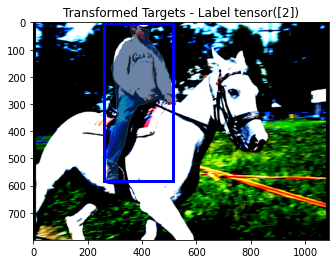

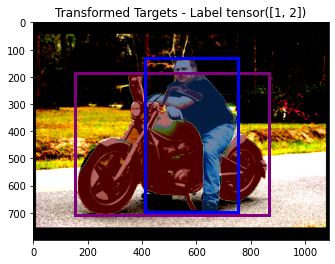

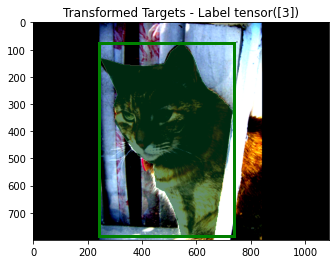

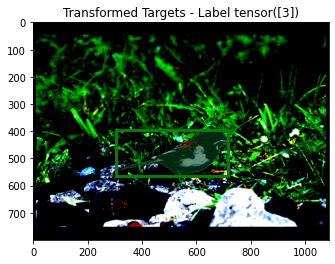

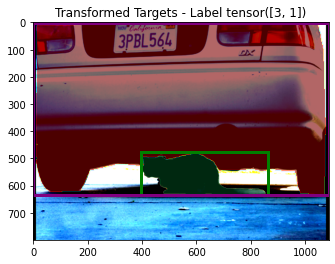

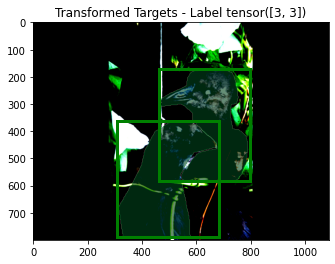

In [25]:
for i in range(6):
    train_build_loader.plot_tranformed_image(i)

In [10]:
# model = BasicModel()

In [5]:
# # Train your model
# trainer = pl.Trainer(gpus=0, max_epochs=1)
# trainer.fit(model, train_loader, test_loader)

In [4]:
rpn_net = RPNHead()
b = next(iter(train_loader))
ground_clas,ground_coord=rpn_net.create_batch_truth(b['bbox'],b['index'],b['images'].shape[-2:])

/Users/smrutichourasia/Desktop/Study/Fall 22/CIS680/HW4/Code_template_HW4_PartA/utils.py:36: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorShape.cpp:2318.)
  pred_area = ((bbox[:,3]-bbox[:,1]) * (bbox[:,2]-bbox[:,0]).T).reshape(-1,1)


# Plot Ground Truth and Bounding Boxes

In [28]:
flatten_clas,flatten_regr, flatten_anchors = output_flattening(ground_clas,ground_coord)
# plot anchors for batch
indices = torch.where(flatten_clas==1)
anchors = flatten_regr[indices[0],:,indices[1]]
cross_boundry,anchor_center, anchor_corners,w,h = rpn_net.get_anchors()
selected_anchor = anchor_corners[torch.stack([torch.where(torch.where(cross_boundry.flatten()==1)[0]==i)[0] for i in indices[1]]).reshape(1,-1)][0]

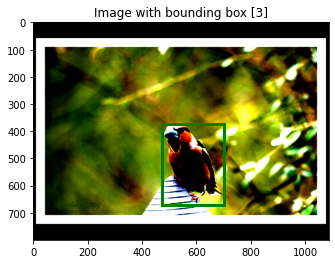

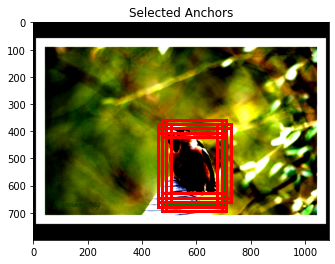

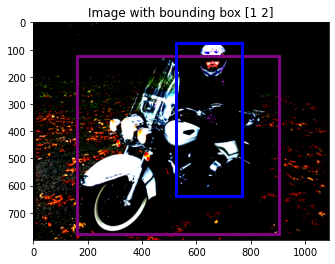

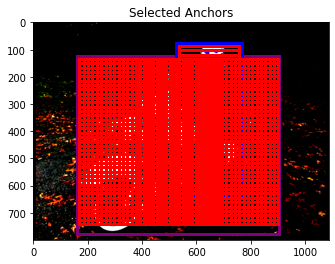

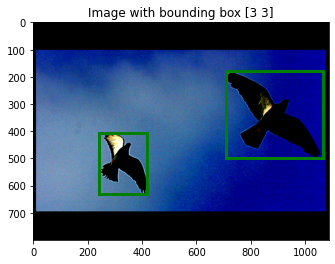

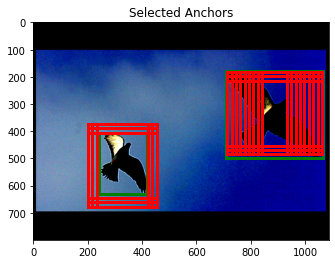

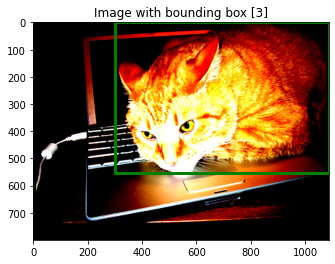

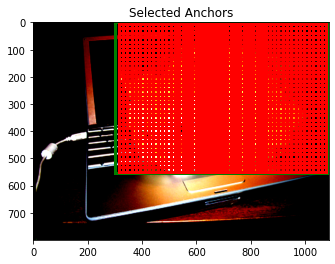

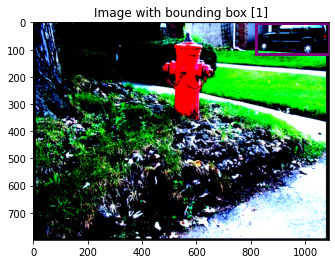

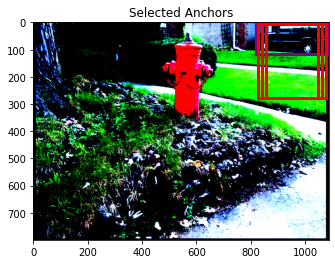

In [31]:
for index in range(5):
    plot_anchors(b['images'][index],b['labels'][index],b['bbox'][index],selected_anchor[torch.where(indices[0]==index)])

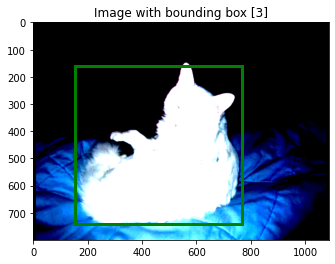

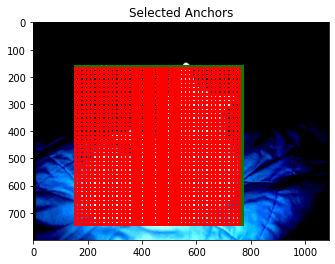

In [20]:
plot_anchors(b['images'][1],b['labels'][1],b['bbox'][1],selected_anchor[torch.where(indices[0]==1)])

# Predictions 